In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df = pd.read_excel(r'C:\Users\kmp\Downloads\US_Regional_Sales_Data.xlsx', index_col=0)

In [3]:
df.info() #checking data

<class 'pandas.core.frame.DataFrame'>
Index: 7991 entries, SO - 000101 to SO - 0008091
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sales Channel     7991 non-null   object        
 1   WarehouseCode     7991 non-null   object        
 2   ProcuredDate      7991 non-null   datetime64[ns]
 3   OrderDate         7991 non-null   datetime64[ns]
 4   ShipDate          7991 non-null   datetime64[ns]
 5   DeliveryDate      7991 non-null   datetime64[ns]
 6   CurrencyCode      7991 non-null   object        
 7   _SalesTeamID      7991 non-null   int64         
 8   _CustomerID       7991 non-null   int64         
 9   _StoreID          7991 non-null   int64         
 10  _ProductID        7991 non-null   int64         
 11  Order Quantity    7991 non-null   int64         
 12  Discount Applied  7991 non-null   float64       
 13  Unit Price        7991 non-null   float64       
 14  Unit Cost  

In [8]:
df.head()

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
OrderNumber,,,,,,,,,,,,,,,
SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [19]:
df.isnull().sum() #no null values found

Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
dtype: int64

In [26]:
df.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413043
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000


In [28]:
df['OrderDate'].min()

Timestamp('2018-05-31 00:00:00')

In [29]:
df['OrderDate'].max()

Timestamp('2020-12-30 00:00:00')

In [4]:
df['month_year'] = df['OrderDate'].dt.strftime('%Y-%m')

In [5]:
df['month_year']  #sucessfuly created month_year column

OrderNumber
SO - 000101     2018-05
SO - 000102     2018-05
SO - 000103     2018-05
SO - 000104     2018-05
SO - 000105     2018-05
                 ...   
SO - 0008087    2020-12
SO - 0008088    2020-12
SO - 0008089    2020-12
SO - 0008090    2020-12
SO - 0008091    2020-12
Name: month_year, Length: 7991, dtype: object

In [6]:
df['Sales'] = df['Order Quantity']*df['Unit Price']   #Created sales column

In [36]:
df.groupby('month_year')['Sales'].sum()

month_year
2018-05      75629.6
2018-06    2454752.7
2018-07    2707550.4
2018-08    2909421.4
2018-09    2798194.7
2018-10    2323720.8
2018-11    2977607.3
2018-12    3046617.3
2019-01    3075112.4
2019-02    2168568.9
2019-03    2199509.5
2019-04    2844987.5
2019-05    2795126.1
2019-06    2596987.0
2019-07    2295286.0
2019-08    2652918.6
2019-09    2610427.2
2019-10    2496795.2
2019-11    3065719.0
2019-12    2733352.1
2020-01    3129998.8
2020-02    2762182.2
2020-03    2314119.7
2020-04    2489539.1
2020-05    2781726.1
2020-06    2349087.0
2020-07    3108042.9
2020-08    2486758.6
2020-09    2380630.6
2020-10    2778717.8
2020-11    2629475.3
2020-12    2654164.8
Name: Sales, dtype: float64

In [32]:
# to find sales by month
df_trend = df.groupby('month_year').sum()['Sales'].reset_index()

In [48]:
df_trend

,month_year,Sales
0,2018-05,75629.6
1,2018-06,2454752.7
2,2018-07,2707550.4
3,2018-08,2909421.4
4,2018-09,2798194.7
5,2018-10,2323720.8
6,2018-11,2977607.3
7,2018-12,3046617.3
8,2019-01,3075112.4
9,2019-02,2168568.9


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

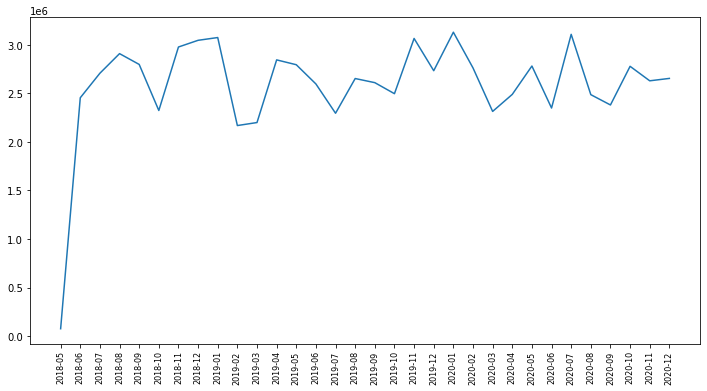

In [53]:
plt.figure(figsize=(12,6))
plt.plot(df_trend['month_year'], df_trend['Sales'])
plt.xticks(rotation='vertical', size=8)

Sharp decline in sales during Feb, July 2019.
Sharp decline in sales during March 2020.
Sharp Incline in sales during July 2020




In [55]:
prod_sales = df.groupby('_ProductID').sum()['Sales'].reset_index()

In [63]:
#Top ten products by Revenue
prod_sales.sort_values('Sales', ascending=False).head(10)



,_ProductID,Sales
22,23,2358788.6
39,40,2130841.2
3,4,2071546.2
36,37,2052886.7
40,41,2049958.8
4,5,2011333.3
1,2,2005638.3
34,35,1981973.9
7,8,1976895.3
16,17,1925111.0


In [65]:
#Group by product and find top 10 products by sales
most_sold = df.groupby('_ProductID').sum()['Order Quantity'].reset_index()


In [66]:
#Top 10 products by sales
most_sold.sort_values('Order Quantity', ascending=False).head(10)

,_ProductID,Order Quantity
22,23,956
36,37,896
7,8,879
3,4,878
39,40,855
40,41,854
21,22,837
37,38,832
26,27,830
11,12,827


<AxesSubplot:xlabel='Sales Channel', ylabel='count'>

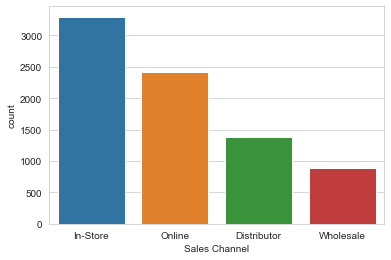

In [67]:
#ploting sales channel
sns.set_style('whitegrid')
sns.countplot(x='Sales Channel', data=df)

In [7]:
# Calculating profit
df['Profit'] = df['Sales'] - df['Unit Cost']

In [10]:
#Top 10 stores by profit
stores_profit = pd.DataFrame(df.groupby('_StoreID')['Profit'].sum().sort_values(ascending=False).head(10))

In [11]:
stores_profit # Top 10 most profitable stores

,Profit
_StoreID,
284,438049.149
26,384533.837
238,375741.427
166,348973.721
347,347924.702
328,345967.096
33,344666.358
303,338622.288
100,327604.875


In [25]:
# gruoping by productID by mean unit cost price
df_cost = df.groupby('_ProductID')['Unit Cost'].mean().reset_index()

In [26]:
df_cost.sum().plot(kind='bar')

,_ProductID,Unit Cost
0,1,1276.443883
1,2,1494.943503
2,3,1452.975244
3,4,1518.234405
4,5,1573.440006
5,6,1359.932065
6,7,1372.619717
7,8,1328.510359
8,9,1329.792353
9,10,1557.210411


<AxesSubplot:xlabel='_StoreID'>

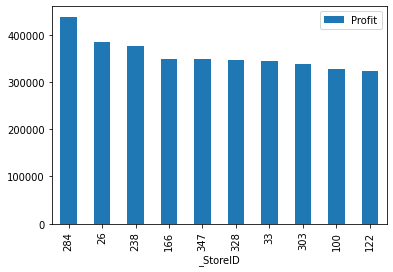

In [28]:
# barplot of top 10 most profitable stores
stores_profit.plot(kind='bar')